In [7]:
## Principal components calculations of EEG binary class data
## XGBoost Classifier for prediction of epileptic versus all non epileptic cases

import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import xgboost as xgb
from xgboost import XGBClassifier

In [16]:
from sklearn import cross_validation
from sklearn.metrics import accuracy_score

In [17]:
# changed the EEG data into a binary class
# Class 1 represents the epileptic cases and Class 0 all the other classes
eeg_xg = pd.read_csv('eeg_class.csv')

In [18]:
eeg_xg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [20]:
Y = list(eeg_xg.pop('y'))

In [21]:
X1 = eeg_xg.values

In [22]:
pca_xg = PCA(n_components=50)

In [23]:
pca_xg.fit(X1)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
var= pca_xg.explained_variance_ratio_

In [27]:
var_xg=np.cumsum(np.round(pca_xg.explained_variance_ratio_, decimals=4)*100)

In [28]:
print(var_xg)

[  5.59  10.85  15.8   20.62  25.06  29.2   33.27  37.19  40.81  44.26
  47.56  50.8   53.77  56.69  59.26  61.64  63.8   65.87  67.89  69.83
  71.76  73.59  75.36  77.1   78.74  80.36  81.86  83.32  84.75  86.15
  87.51  88.8   90.04  91.18  92.26  93.23  94.03  94.71  95.35  95.89
  96.36  96.79  97.17  97.48  97.74  97.97  98.18  98.36  98.53  98.68]


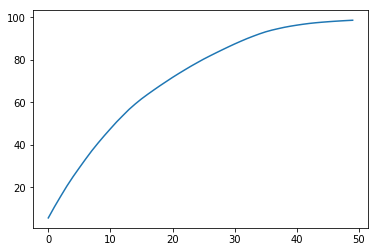

In [29]:
plt.plot(var_xg)

In [32]:
X = pca_xg.fit_transform(X1)

In [35]:
X.shape

(11500, 50)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [49]:
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [50]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [51]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [53]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.81%


In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
cm = confusion_matrix(Y_test,predictions, labels = [0, 1])

In [58]:
print(cm)

[[2716   43]
 [  67  624]]


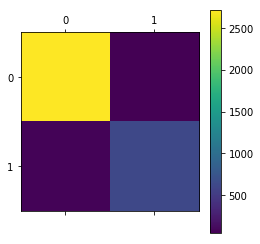

In [59]:
plt.matshow(cm)
plt.colorbar()
plt.show()

In [96]:
# XGBoost on Cross validation split 
from sklearn.model_selection import cross_val_score

In [95]:
# split data into train and test sets for cross validation for XGBoost Classifier 
seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [62]:
# fit model no training data
model_1 = xgboost.XGBClassifier()
model_1.fit(x_train, y_train)
print(model_1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [63]:
# make predictions for test data
pred = model.predict(x_test)
predict = [round(value) for value in pred]

In [65]:
# evaluate predictions
accuracy = accuracy_score(y_test, predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.10%


In [66]:
confusion = confusion_matrix(y_test, predict, labels = [0, 1])

In [67]:
print(confusion)

[[2976   29]
 [  43  747]]


In [72]:
len(y_test)

3795

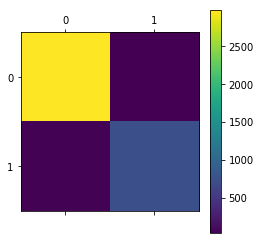

In [68]:
plt.matshow(confusion)
plt.colorbar()
plt.show()

In [73]:
TP = confusion[1, 1] # Class 1 predicted as Class 1: Epileptic
TN = confusion[0, 0] # Class other classes predicted as Class 0: non epileptic
FP = confusion[0, 1] # non-epileptic predicted as epileptic
FN = confusion[1, 0] # epileptic predicted as non-epileptic

In [86]:
from sklearn import metrics
print("Accuracy")
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, predict))

Accuracy
0.981027667984
0.981027667984


In [87]:
# Misclassification rate
print("Miscalculation")
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, predict))

Miscalculation
0.0189723320158
0.0189723320158


In [81]:
print("Sensitivity")  
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, predict))

Sensitivity
0.945569620253
0.945569620253


In [80]:
# Selectivity
print("selectivity")
print(TN / float(TN + FP))

selectivity
0.990349417637


In [82]:
print("False Positive Rate")
print(FP / float(TN + FP))

False Positive Rate
0.00965058236273


In [84]:
print("Precision")
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, predict))

Precision
0.962628865979
0.962628865979


In [ ]:
## End: XGBoost Classification of ictal versus non-ictal cases understanding Epilepsy 